# Data Analysis on Laptop Dataset

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [196]:
df=pd.read_csv("laptop_data.csv")

In [197]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [198]:
df.shape

(1303, 12)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [200]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [201]:
df.describe(include=object)

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1303,1303,1303,1303,1303,1303,1303,1303,1303
unique,19,6,40,118,9,39,110,9,179
top,Dell,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,297,727,507,190,619,412,281,1072,121


In [202]:
df.isnull().sum()/len(df)*100

Unnamed: 0          0.0
Company             0.0
TypeName            0.0
Inches              0.0
ScreenResolution    0.0
Cpu                 0.0
Ram                 0.0
Memory              0.0
Gpu                 0.0
OpSys               0.0
Weight              0.0
Price               0.0
dtype: float64

In [203]:
df.duplicated().sum()/len(df)*100

0.0

In [204]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# Data Cleaning

In [205]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [206]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [207]:
df['Ram']=df['Ram'].str.replace("GB","")

In [208]:
df['Ram']=df['Ram'].astype(int)

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), int32(1), object(8)
memory usage: 107.0+ KB


In [210]:
df['Weight']=df['Weight'].str.replace("kg","")

In [211]:
df['Weight']=df['Weight'].astype(float)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 107.0+ KB


In [213]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200


In [214]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Windows 10 S       8
Mac OS X           8
Android            2
Name: OpSys, dtype: int64

# Exploratory data analysis

In [215]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200


# 1. Target Feature

<AxesSubplot:xlabel='Price'>

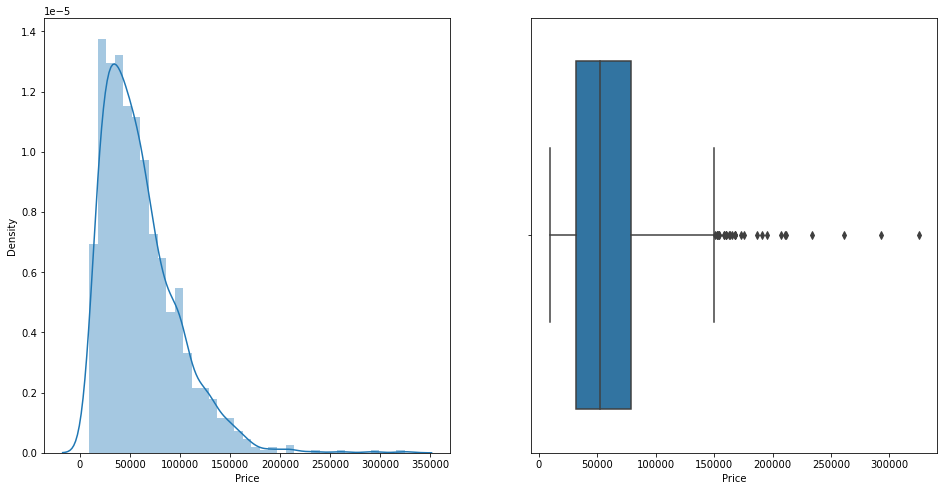

In [216]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.distplot(df['Price'])

plt.subplot(1,2,2)
sns.boxplot(df['Price'])

# 2 Company Feature

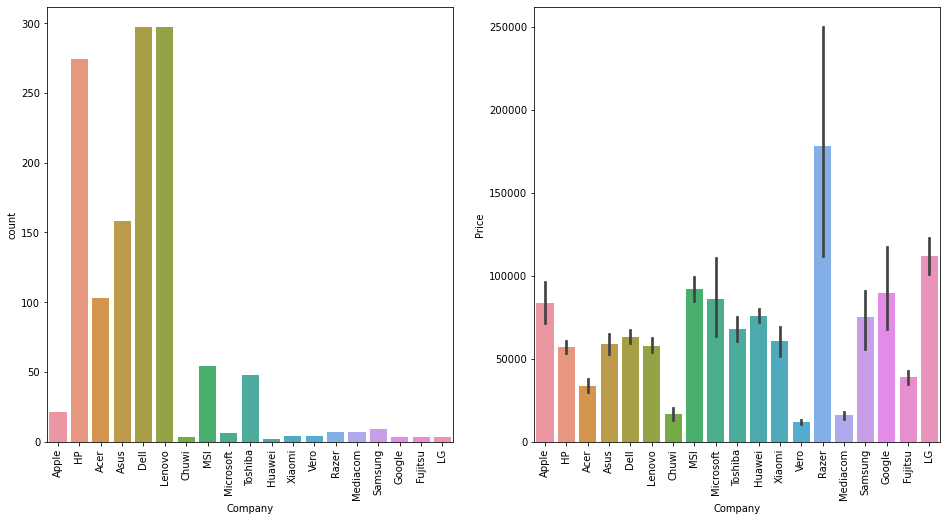

In [217]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(df['Company'])
plt.xticks(rotation=90)


plt.subplot(1,2,2)
sns.barplot(df['Company'],df['Price'],data=df)
plt.xticks(rotation=90)
plt.show()


# 3 Type name feature

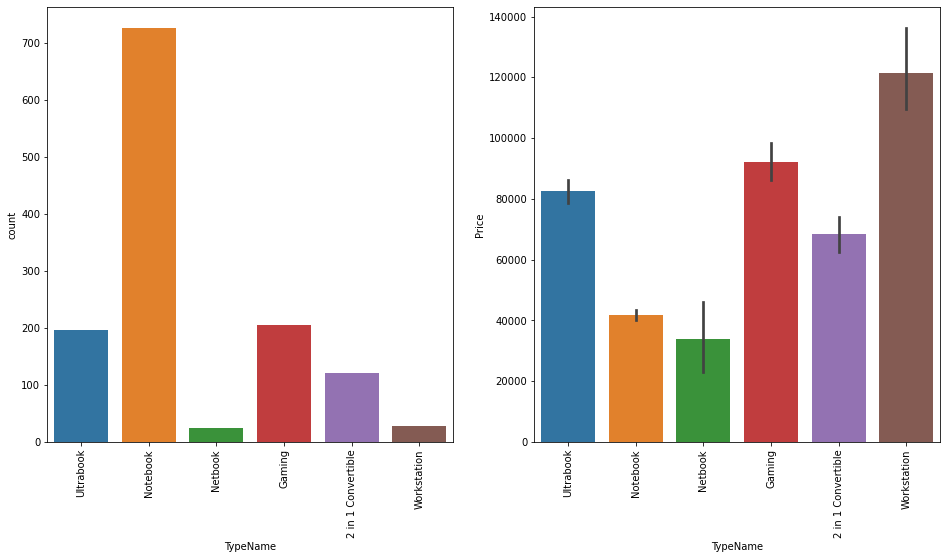

In [218]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(df['TypeName'])
plt.xticks(rotation=90)


plt.subplot(1,2,2)
sns.barplot(df['TypeName'],df['Price'],data=df)
plt.xticks(rotation=90)
plt.show()


In [219]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [220]:
df['Operating_system']=df['OpSys'].apply(cat_os)

# 4 Operating_System Feature

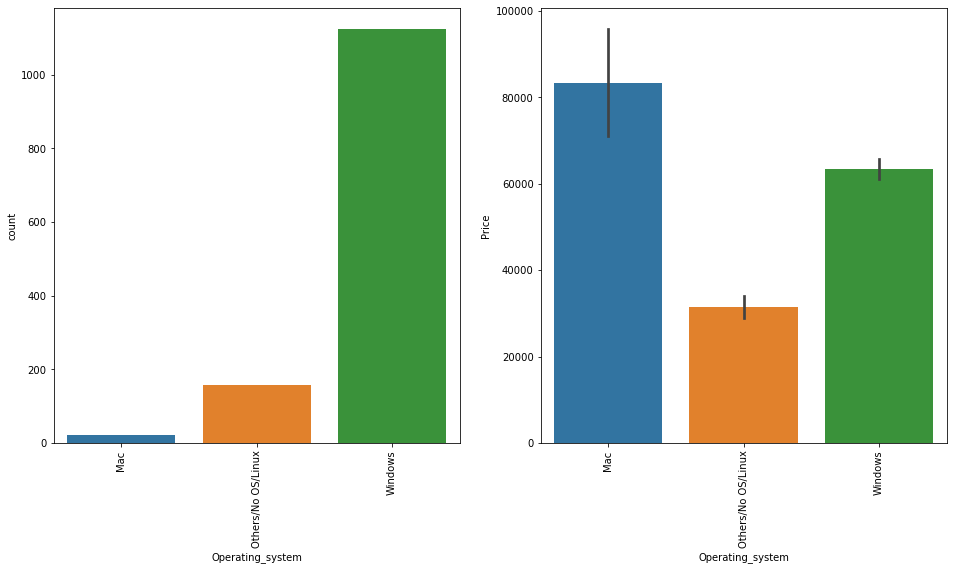

In [221]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(df['Operating_system'])
plt.xticks(rotation=90)


plt.subplot(1,2,2)
sns.barplot(df['Operating_system'],df['Price'],data=df)
plt.xticks(rotation=90)
plt.show()


# 5 Inches Feature

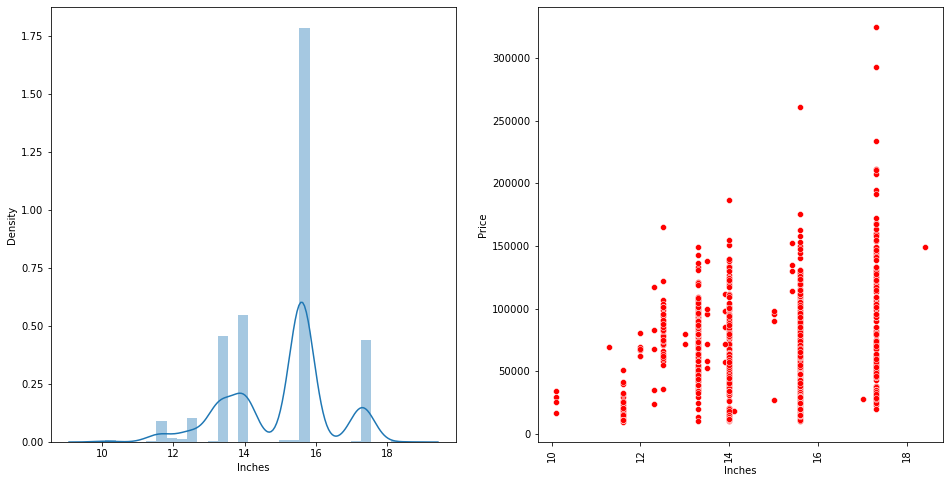

In [222]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.distplot(df['Inches'])

plt.subplot(1,2,2)
sns.scatterplot(df['Inches'],df['Price'],color='red',data=df)
plt.xticks(rotation=90)
plt.show()


# 6 Ram Feature

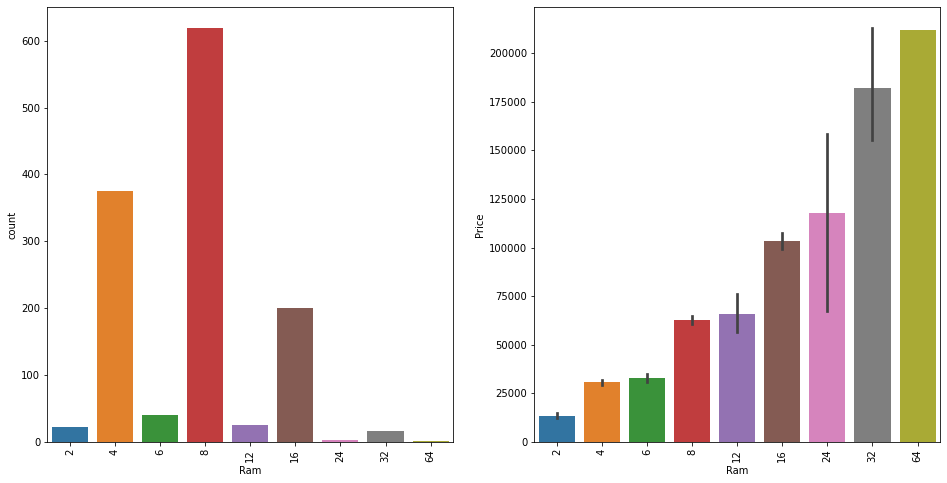

In [223]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(df['Ram'])
plt.xticks(rotation=90)


plt.subplot(1,2,2)
sns.barplot(df['Ram'],df['Price'],data=df)
plt.xticks(rotation=90)
plt.show()


# 7 Weight Features

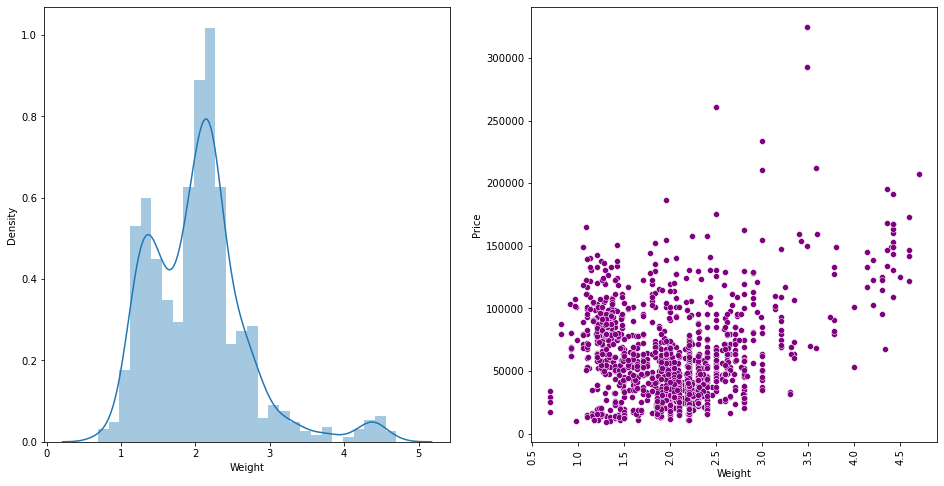

In [224]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.distplot(df['Weight'])


plt.subplot(1,2,2)
sns.scatterplot(df['Weight'],df['Price'],color='purple',data=df)
plt.xticks(rotation=90)
plt.show()

# Feature Engineering

In [225]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Touchscreen 2560x1440               

In [226]:
df['TouchScreen']=df['ScreenResolution'].apply(lambda  x:1 if 'Touchscreen' in x else 0)

In [227]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Operating_system,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Mac,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Mac,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Others/No OS/Linux,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Mac,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Mac,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,Windows,1
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,Windows,1
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,Windows,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,Windows,0


# 8 TouchScreen Feature

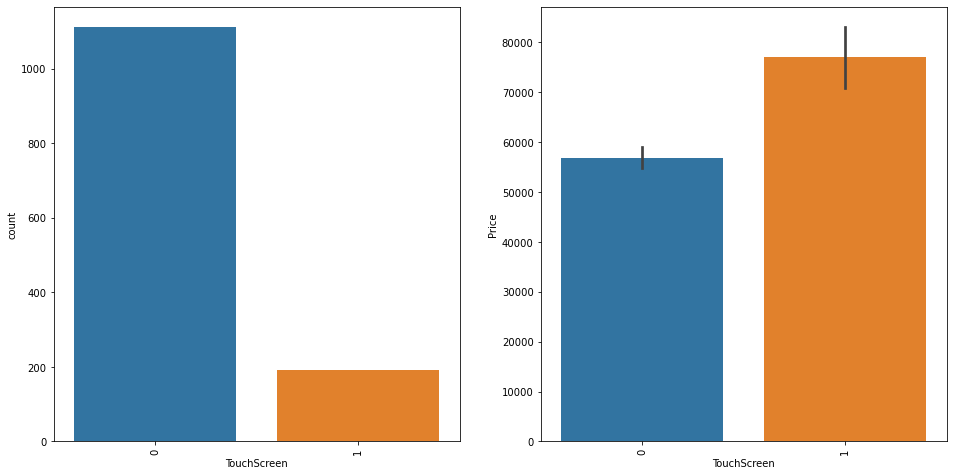

In [228]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(df['TouchScreen'])
plt.xticks(rotation=90)


plt.subplot(1,2,2)
sns.barplot(df['TouchScreen'],df['Price'],data=df)
plt.xticks(rotation=90)
plt.show()


In [229]:
df['IPS']=df['ScreenResolution'].apply(lambda  x:1 if 'IPS' in x else 0)

In [230]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Operating_system,TouchScreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Mac,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Mac,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Others/No OS/Linux,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Mac,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Mac,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,Windows,1,1
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,Windows,1,1
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,Windows,0,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,Windows,0,0


# 9 IPS Feature

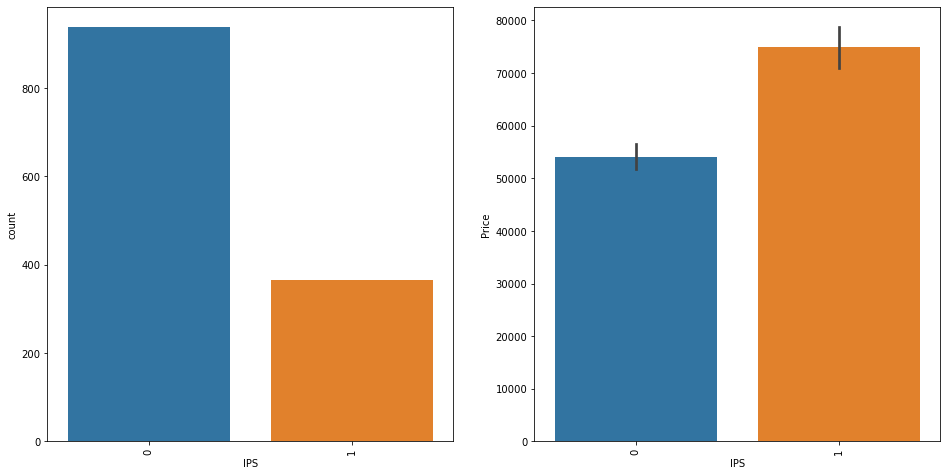

In [231]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(df['IPS'])
plt.xticks(rotation=90)


plt.subplot(1,2,2)
sns.barplot(df['IPS'],df['Price'],data=df)
plt.xticks(rotation=90)
plt.show()


In [232]:
df['4K_Ultra_HD']=df['ScreenResolution'].apply(lambda  x:1 if '4K Ultra HD' in x else 0)

In [233]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Operating_system,TouchScreen,IPS,4K_Ultra_HD
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Mac,0,1,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Mac,0,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Others/No OS/Linux,0,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Mac,0,1,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Mac,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,Windows,1,1,0
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,Windows,1,1,0
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,Windows,0,0,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,Windows,0,0,0


# 10 4K_Ultra_Hd Features 

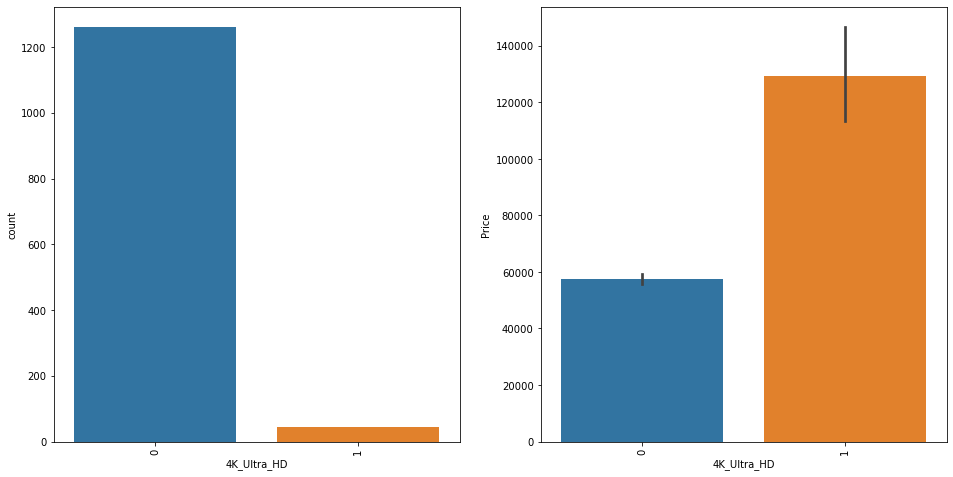

In [234]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(df['4K_Ultra_HD'])
plt.xticks(rotation=90)


plt.subplot(1,2,2)
sns.barplot(df['4K_Ultra_HD'],df['Price'],data=df)
plt.xticks(rotation=90)
plt.show()


In [235]:
df["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz              190
Intel Core i7 7700HQ 2.8GHz             146
Intel Core i7 7500U 2.7GHz              134
Intel Core i7 8550U 1.8GHz               73
Intel Core i5 8250U 1.6GHz               72
                                       ... 
Intel Core i7 2.9GHz                      1
Intel Core i3 6100U 2.1GHz                1
Intel Pentium Dual Core 4405U 2.1GHz      1
Intel Atom x5-Z8300 1.44GHz               1
Intel Celeron Quad Core N3710 1.6GHz      1
Name: Cpu, Length: 118, dtype: int64

In [236]:
df['CPU_Name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [237]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Operating_system,TouchScreen,IPS,4K_Ultra_HD,CPU_Name
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Mac,0,1,0,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Mac,0,0,0,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Others/No OS/Linux,0,0,0,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Mac,0,1,0,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Mac,0,1,0,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,Windows,1,1,0,Intel Core i7
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,Windows,1,1,0,Intel Core i7
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,Windows,0,0,0,Intel Celeron Dual
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,Windows,0,0,0,Intel Core i7


In [238]:
def fetch_processor(text):
    if text== "Intel Core i7" or text=='Intel Core i5' or text=="Intel Core i3":
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Intel Other Processor'
        else:
            return 'AMD Processor'
    

In [239]:
df['CPU_BRAND']=df['CPU_Name'].apply(fetch_processor)

In [240]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Operating_system,TouchScreen,IPS,4K_Ultra_HD,CPU_Name,CPU_BRAND
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Mac,0,1,0,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Mac,0,0,0,Intel Core i5,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Others/No OS/Linux,0,0,0,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Mac,0,1,0,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Mac,0,1,0,Intel Core i5,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,Windows,1,1,0,Intel Core i7,Intel Core i7
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,Windows,1,1,0,Intel Core i7,Intel Core i7
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,Windows,0,0,0,Intel Celeron Dual,Intel Other Processor
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,Windows,0,0,0,Intel Core i7,Intel Core i7


In [241]:
df.drop(columns=['Cpu','ScreenResolution','CPU_Name'],inplace=True)

In [242]:
df

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Operating_system,TouchScreen,IPS,4K_Ultra_HD,CPU_BRAND
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Mac,0,1,0,Intel Core i5
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Mac,0,0,0,Intel Core i5
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Others/No OS/Linux,0,0,0,Intel Core i5
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Mac,0,1,0,Intel Core i7
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Mac,0,1,0,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,Windows,1,1,0,Intel Core i7
1299,Lenovo,2 in 1 Convertible,13.3,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,Windows,1,1,0,Intel Core i7
1300,Lenovo,Notebook,14.0,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,Windows,0,0,0,Intel Other Processor
1301,HP,Notebook,15.6,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,Windows,0,0,0,Intel Core i7


In [243]:
df['CPU_BRAND'].value_counts()

Intel Core i7            527
Intel Core i5            423
Intel Other Processor    154
Intel Core i3            136
AMD Processor             63
Name: CPU_BRAND, dtype: int64

# 11 CPU_BRAND feature

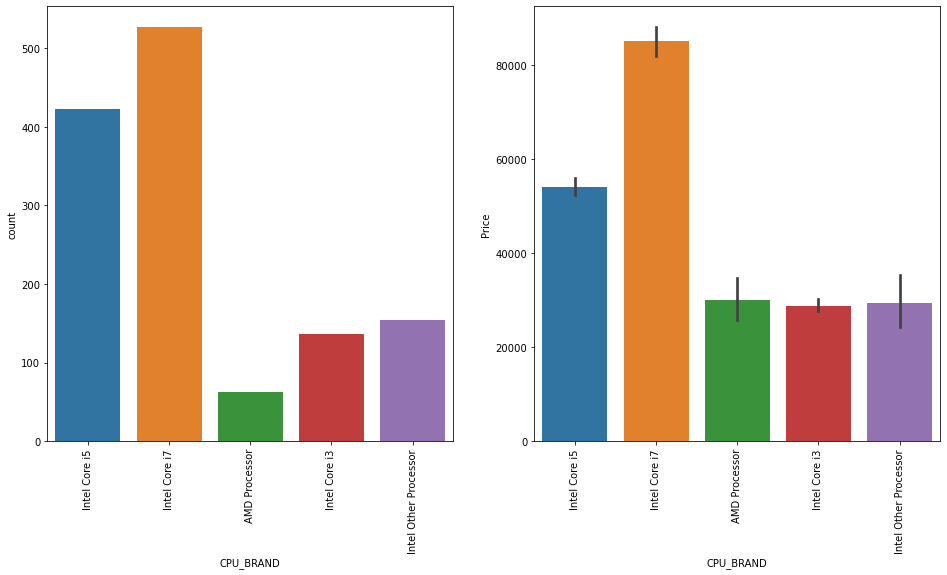

In [244]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(df['CPU_BRAND'])
plt.xticks(rotation=90)


plt.subplot(1,2,2)
sns.barplot(df['CPU_BRAND'],df['Price'],data=df)
plt.xticks(rotation=90)
plt.show()

In [245]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
128GB SSD +  2TB HDD               2
1TB SSD +  1TB HDD                 2
512GB Flash Storage                2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
64GB Flash Storage +  1TB HDD      1
8

In [246]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [247]:
df

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Operating_system,TouchScreen,IPS,4K_Ultra_HD,CPU_BRAND,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Mac,0,1,0,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,Mac,0,0,0,Intel Core i5,0,0,0,128
2,HP,Notebook,15.6,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Others/No OS/Linux,0,0,0,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,Mac,0,1,0,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Mac,0,1,0,Intel Core i5,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,Windows,1,1,0,Intel Core i7,0,128,0,0
1299,Lenovo,2 in 1 Convertible,13.3,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,Windows,1,1,0,Intel Core i7,0,512,0,0
1300,Lenovo,Notebook,14.0,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,Windows,0,0,0,Intel Other Processor,0,0,0,64
1301,HP,Notebook,15.6,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,Windows,0,0,0,Intel Core i7,1000,0,0,0


# 12 HDD Feature

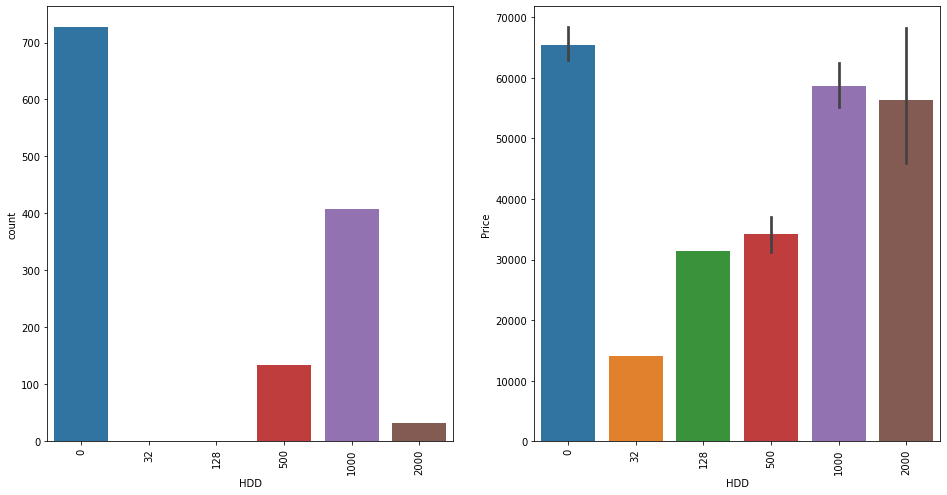

In [248]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(df['HDD'])
plt.xticks(rotation=90)


plt.subplot(1,2,2)
sns.barplot(df['HDD'],df['Price'],data=df)
plt.xticks(rotation=90)
plt.show()

# 13 SSD Feature

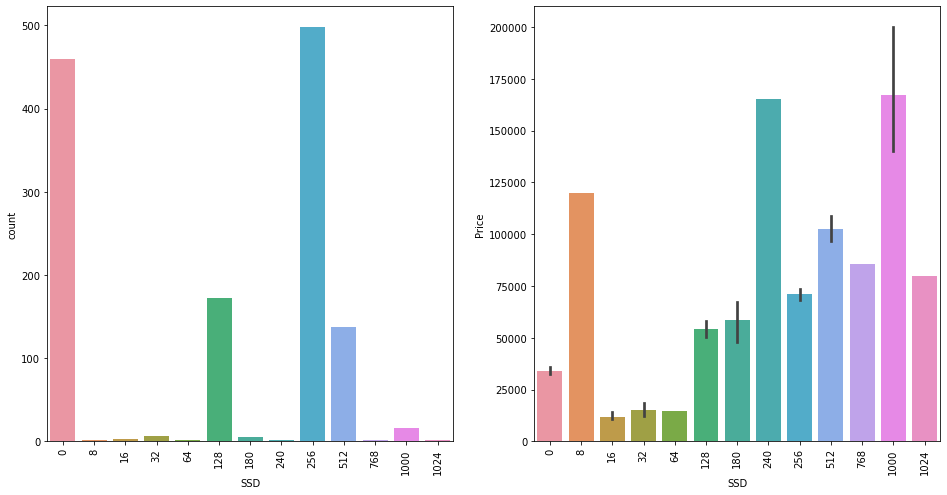

In [249]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(df['SSD'])
plt.xticks(rotation=90)


plt.subplot(1,2,2)
sns.barplot(df['SSD'],df['Price'],data=df)
plt.xticks(rotation=90)
plt.show()

# 14 Hybrid Feature

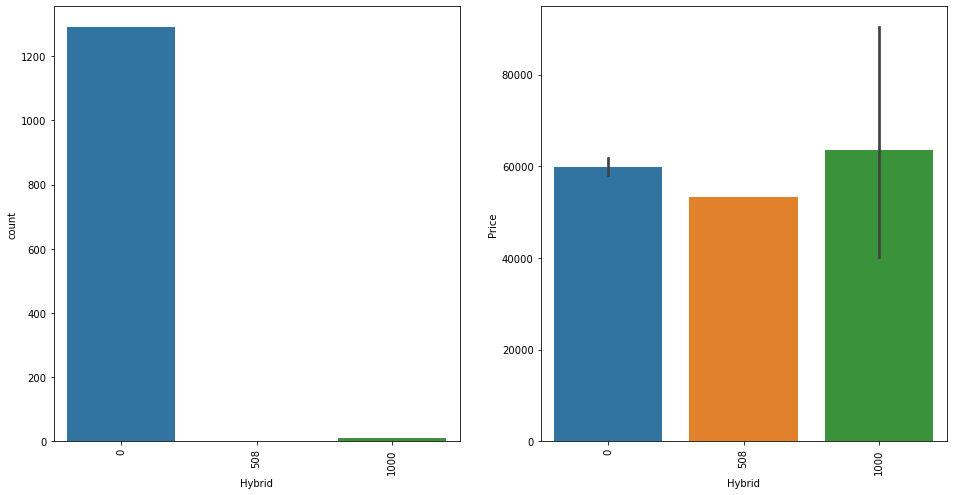

In [250]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(df['Hybrid'])
plt.xticks(rotation=90)


plt.subplot(1,2,2)
sns.barplot(df['Hybrid'],df['Price'],data=df)
plt.xticks(rotation=90)
plt.show()

In [251]:
df.drop(columns=['Memory'],inplace=True)

In [252]:
df

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Operating_system,TouchScreen,IPS,4K_Ultra_HD,CPU_BRAND,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Mac,0,1,0,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,Mac,0,0,0,Intel Core i5,0,0,0,128
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,Others/No OS/Linux,0,0,0,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,Mac,0,1,0,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Mac,0,1,0,Intel Core i5,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,Windows,1,1,0,Intel Core i7,0,128,0,0
1299,Lenovo,2 in 1 Convertible,13.3,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,Windows,1,1,0,Intel Core i7,0,512,0,0
1300,Lenovo,Notebook,14.0,2,Intel HD Graphics,Windows 10,1.50,12201.1200,Windows,0,0,0,Intel Other Processor,0,0,0,64
1301,HP,Notebook,15.6,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,Windows,0,0,0,Intel Core i7,1000,0,0,0


In [253]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia GeForce GTX 980       1
Nvidia GeForce GTX1080       1
Nvidia GeForce 960M          1
AMD FirePro W6150M           1
AMD Radeon R5 M315           1
Name: Gpu, Length: 110, dtype: int64

In [254]:
df['GPU_BRAND']=df['Gpu'].apply(lambda x:x.split()[0])

In [255]:
df

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Operating_system,TouchScreen,IPS,4K_Ultra_HD,CPU_BRAND,HDD,SSD,Hybrid,Flash_Storage,GPU_BRAND
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Mac,0,1,0,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,Mac,0,0,0,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,Others/No OS/Linux,0,0,0,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,Mac,0,1,0,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Mac,0,1,0,Intel Core i5,0,256,0,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,Windows,1,1,0,Intel Core i7,0,128,0,0,Intel
1299,Lenovo,2 in 1 Convertible,13.3,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,Windows,1,1,0,Intel Core i7,0,512,0,0,Intel
1300,Lenovo,Notebook,14.0,2,Intel HD Graphics,Windows 10,1.50,12201.1200,Windows,0,0,0,Intel Other Processor,0,0,0,64,Intel
1301,HP,Notebook,15.6,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,Windows,0,0,0,Intel Core i7,1000,0,0,0,AMD


In [256]:
df['GPU_BRAND'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: GPU_BRAND, dtype: int64

In [257]:
df = df[df['GPU_BRAND'] != 'ARM']

In [258]:
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Operating_system,TouchScreen,IPS,4K_Ultra_HD,CPU_BRAND,HDD,SSD,Hybrid,Flash_Storage,GPU_BRAND
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Mac,0,1,0,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,Mac,0,0,0,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,Others/No OS/Linux,0,0,0,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,Mac,0,1,0,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Mac,0,1,0,Intel Core i5,0,256,0,0,Intel


# 15 GPU_BRAND Feature

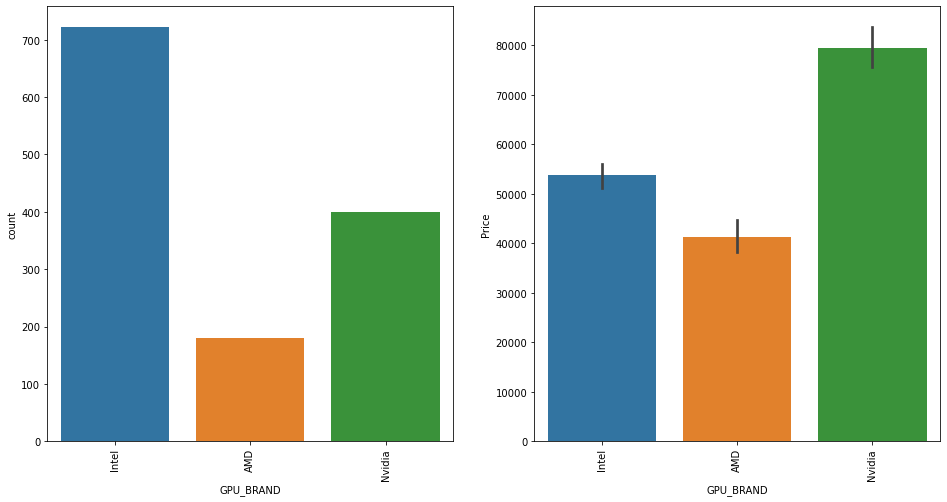

In [259]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(df['GPU_BRAND'])
plt.xticks(rotation=90)


plt.subplot(1,2,2)
sns.barplot(df['GPU_BRAND'],df['Price'],data=df)
plt.xticks(rotation=90)
plt.show()

In [260]:
df

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Operating_system,TouchScreen,IPS,4K_Ultra_HD,CPU_BRAND,HDD,SSD,Hybrid,Flash_Storage,GPU_BRAND
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,Mac,0,1,0,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,Mac,0,0,0,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,Others/No OS/Linux,0,0,0,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,Mac,0,1,0,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,Mac,0,1,0,Intel Core i5,0,256,0,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,Windows,1,1,0,Intel Core i7,0,128,0,0,Intel
1299,Lenovo,2 in 1 Convertible,13.3,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,Windows,1,1,0,Intel Core i7,0,512,0,0,Intel
1300,Lenovo,Notebook,14.0,2,Intel HD Graphics,Windows 10,1.50,12201.1200,Windows,0,0,0,Intel Other Processor,0,0,0,64,Intel
1301,HP,Notebook,15.6,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,Windows,0,0,0,Intel Core i7,1000,0,0,0,AMD


In [261]:
df.drop(columns=['Gpu'],inplace=True)

In [262]:
df

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Operating_system,TouchScreen,IPS,4K_Ultra_HD,CPU_BRAND,HDD,SSD,Hybrid,Flash_Storage,GPU_BRAND
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,Mac,0,1,0,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,Mac,0,0,0,Intel Core i5,0,0,0,128,Intel
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,Others/No OS/Linux,0,0,0,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,15.4,16,macOS,1.83,135195.3360,Mac,0,1,0,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,Mac,0,1,0,Intel Core i5,0,256,0,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,Windows 10,1.80,33992.6400,Windows,1,1,0,Intel Core i7,0,128,0,0,Intel
1299,Lenovo,2 in 1 Convertible,13.3,16,Windows 10,1.30,79866.7200,Windows,1,1,0,Intel Core i7,0,512,0,0,Intel
1300,Lenovo,Notebook,14.0,2,Windows 10,1.50,12201.1200,Windows,0,0,0,Intel Other Processor,0,0,0,64,Intel
1301,HP,Notebook,15.6,6,Windows 10,2.19,40705.9200,Windows,0,0,0,Intel Core i7,1000,0,0,0,AMD


In [263]:
df['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    120
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

In [264]:
df.drop(columns=['OpSys'],inplace=True)

# Apply One hot Encoding on Categorical Columns For ML model

In [267]:
df= pd.get_dummies(columns=['Company','TypeName','Operating_system','CPU_BRAND','GPU_BRAND'],data=df)

In [268]:
df

,Inches,Ram,Weight,Price,TouchScreen,IPS,4K_Ultra_HD,HDD,SSD,Hybrid,...,Operating_system_Others/No OS/Linux,Operating_system_Windows,CPU_BRAND_AMD Processor,CPU_BRAND_Intel Core i3,CPU_BRAND_Intel Core i5,CPU_BRAND_Intel Core i7,CPU_BRAND_Intel Other Processor,GPU_BRAND_AMD,GPU_BRAND_Intel,GPU_BRAND_Nvidia
0,13.3,8,1.37,71378.6832,0,1,0,0,128,0,...,0,0,0,0,1,0,0,0,1,0
1,13.3,8,1.34,47895.5232,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,15.6,8,1.86,30636.0000,0,0,0,0,256,0,...,1,0,0,0,1,0,0,0,1,0
3,15.4,16,1.83,135195.3360,0,1,0,0,512,0,...,0,0,0,0,0,1,0,1,0,0
4,13.3,8,1.37,96095.8080,0,1,0,0,256,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,4,1.80,33992.6400,1,1,0,0,128,0,...,0,1,0,0,0,1,0,0,1,0
1299,13.3,16,1.30,79866.7200,1,1,0,0,512,0,...,0,1,0,0,0,1,0,0,1,0
1300,14.0,2,1.50,12201.1200,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1301,15.6,6,2.19,40705.9200,0,0,0,1000,0,0,...,0,1,0,0,0,1,0,1,0,0
